# Individual Planning Report


## (1) Data Description 

CSV File #1: **players.csv**
This dataset sumamrizes individual Minecraft players from UBC's PLAI group. It is composed of 196 observations and uses 7 variables.  
|Variable | Variable Type | Description|
| --------|------|-------------|
|Experience| character| Player self-identified exeperience level as a Minecraft player*|
|Subscribe | logical| Newsletter sign-up (True/False)|
|HashedEmail| character| unique player indentifier/hashed email address|
|Playedhours| numeric| Total hours played|
|Name| character| Player name (pseudonyms)|
|Gender| character| Gender identity|
|Age|numeric| Age in years| 
*The levels are: 'Pro', 'Veteran', 'Amateur', 'Regular', and 'Beginner'
Issues and limitations in this dataset: 
1) The "experience level" groups are imbalanced with some levels (e.g. 'regular') having many more observations than others. 
2) Many players have less than an hour played, causing a right skew in the data.
3) The experience level category could be imprecise and biased since it was self reported
4) Server errors and or technical glitches could have lead to inacurate data recordings while playing (i.e. incorrectly recording number of hours played). 

## (2) Questions 


**Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various palyer types? 

**More specific second question/ follow up:** Can played hours, player experience, gender, and age be used to predict who would subscribe to the newsletter? 

## (3) Exploratory Data Analysis and Visualizations 

(3.1) Loading the libraries and datasets: 

In [17]:
#Libraries
library(tidyverse) 
library(repr)
library(tabulizer)
library(tidyverse)



ERROR: Error in library(tabulizer): there is no package called ‘tabulizer’


In [19]:
players <- read.csv(https://raw.githubusercontent.com/mimi15090/dsci-100-2025w1-group-024/refs/heads/main/players.csv) 
players

ERROR: Error in parse(text = x, srcfile = src): <text>:1:70: unexpected symbol
1: players <- read.csv(raw.githubusercontent.com/mimi15090/dsci-100-2025w1
                                                                         ^


In [ ]:
#Inspecting Data
str(players)
summary(players)
colSums(is.na(players))
head(players)

In [8]:
#Cleaning data
players_tidy <- players|>
    mutate(subscribe=as.factor(subscribe),
           experience = as.factor(experience),
           gender =as.factor(gender))|>
    select(played_hours,experience, gender, Age, subscribe) 
#remove N/as 
players_cleaned <- na.omit(players_tidy) 
players_cleaned 

,played_hours,experience,gender,Age,subscribe
,<dbl>,<fct>,<fct>,<int>,<fct>
1,30.3,Pro,Male,9,TRUE
2,3.8,Veteran,Male,17,TRUE
3,0.0,Veteran,Male,17,FALSE
4,0.7,Amateur,Female,21,TRUE
5,0.1,Regular,Male,21,TRUE
6,0.0,Amateur,Female,17,TRUE
7,0.0,Regular,Female,19,TRUE
8,0.0,Amateur,Male,21,FALSE
9,0.1,Amateur,Male,47,TRUE


In [9]:
#Summary table of means 
players_cleaned |>
summarise(Mean_played_hours = round(mean(played_hours),2), 
          Mean_Age = round(mean(Age),2))


Mean_played_hours,Mean_Age
<dbl>,<dbl>
5.9,21.14


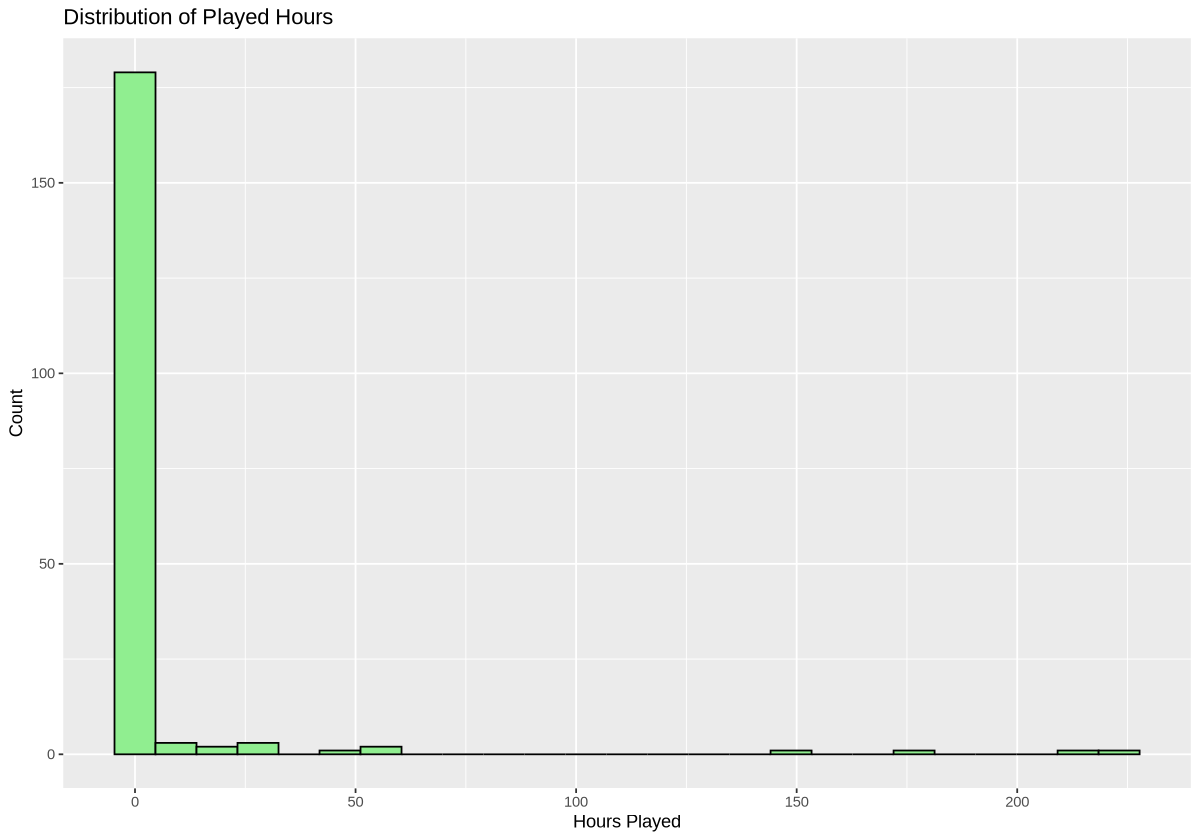

In [10]:
#PLOTS!
#plot one, histogram of played hours, plot1
options(repr.plot.width =10, repr.plot.height = 7)
plot1 <- ggplot(players_cleaned, aes(played_hours))+
            geom_histogram(bins=25, fill= "lightgreen", color ="black")+
            labs(title= "Distribution of Played Hours" , x= "Hours Played", y= "Count")
plot1



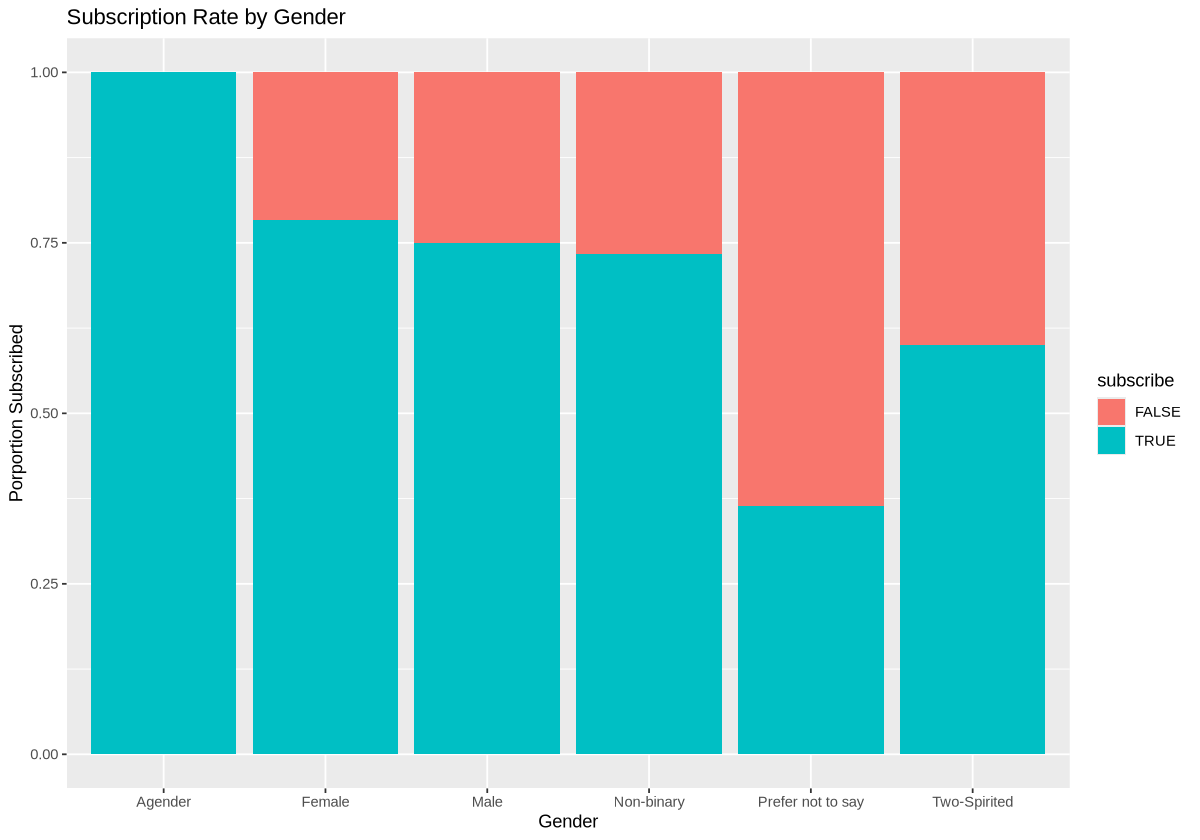

In [11]:
#PLOT 2: subscription by gender
options(repr.plot.width =10, repr.plot.height= 7)
plot2 <- ggplot(players_cleaned, aes(gender, fill=subscribe))+
            geom_bar(position="fill") +
            labs(title= "Subscription Rate by Gender", x= "Gender",
                 y="Porportion Subscribed")
plot2


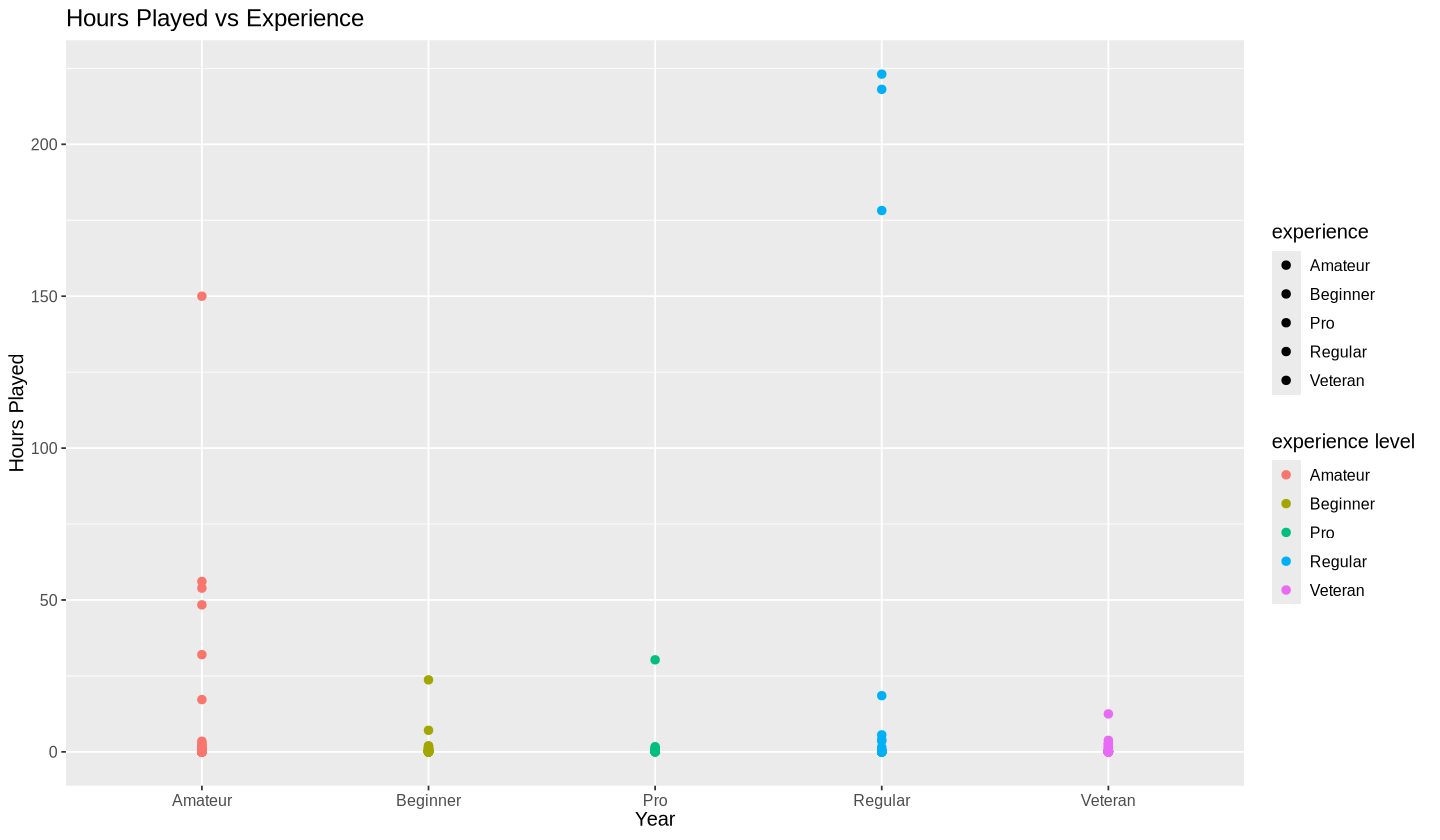

In [12]:
options(repr.plot.width = 12, repr.plot.height =7 ) 
plot3 <- players_cleaned|>
ggplot(aes(x = experience, y = played_hours, fill=experience)) +
geom_point(size=2, aes(colour =  experience)) + 
           labs(x= "Year", y = "Hours Played", colour = "experience level", title= "Hours Played vs Experience") +
                       theme(text = element_text(size = 12))
plot3

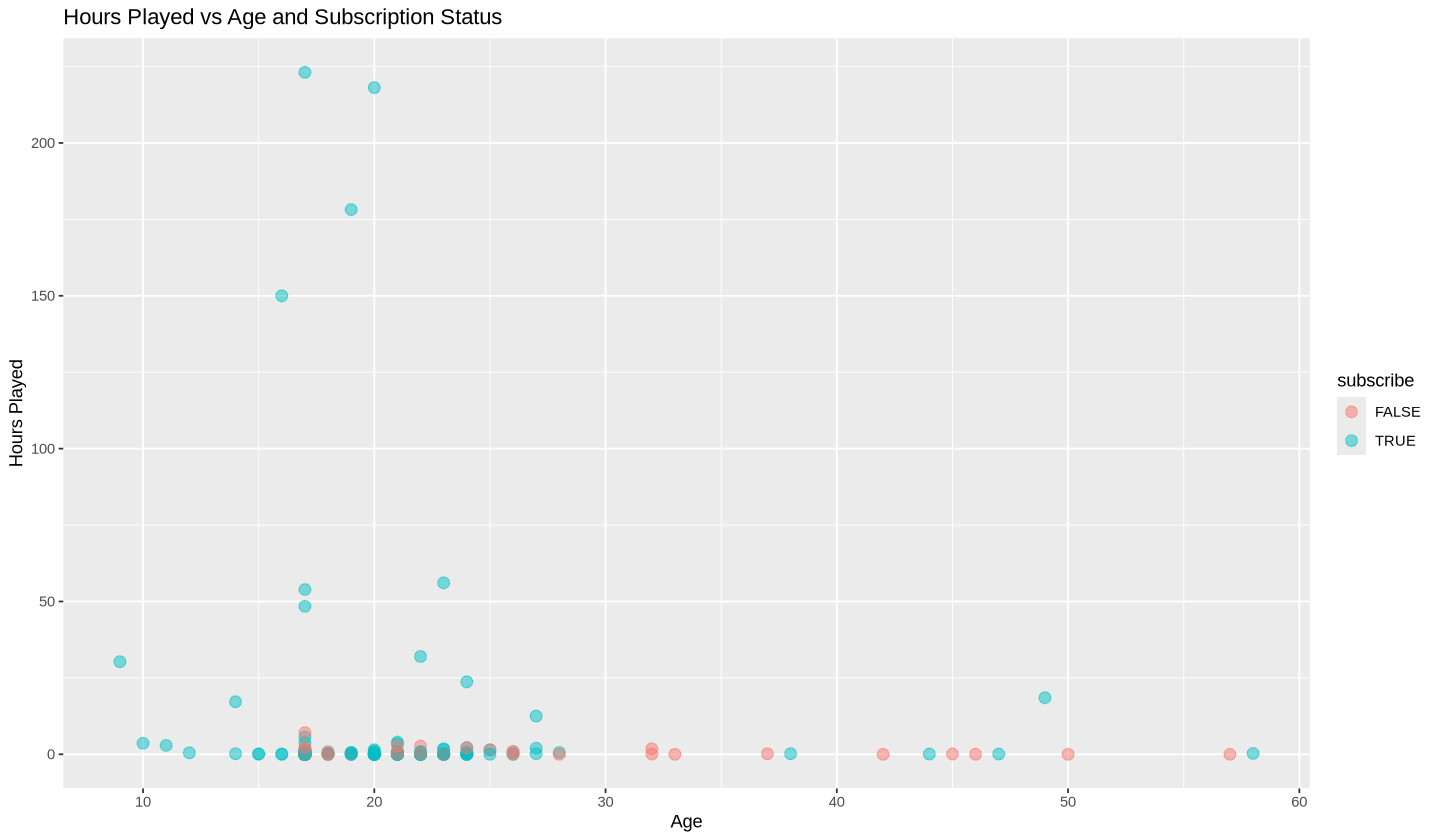

In [13]:
#plot4, age vs hours played, scatterplot
options(reper.plot.width=12, repr.plot.height =7)
plot4<- players_cleaned|>
        ggplot(aes(x= Age, y = played_hours, fill= subscribe))+
        geom_point(alpha=0.5,size=3, aes(color=subscribe))+
        labs(title= "Hours Played vs Age and Subscription Status", x="Age", y= "Hours Played")
plot4

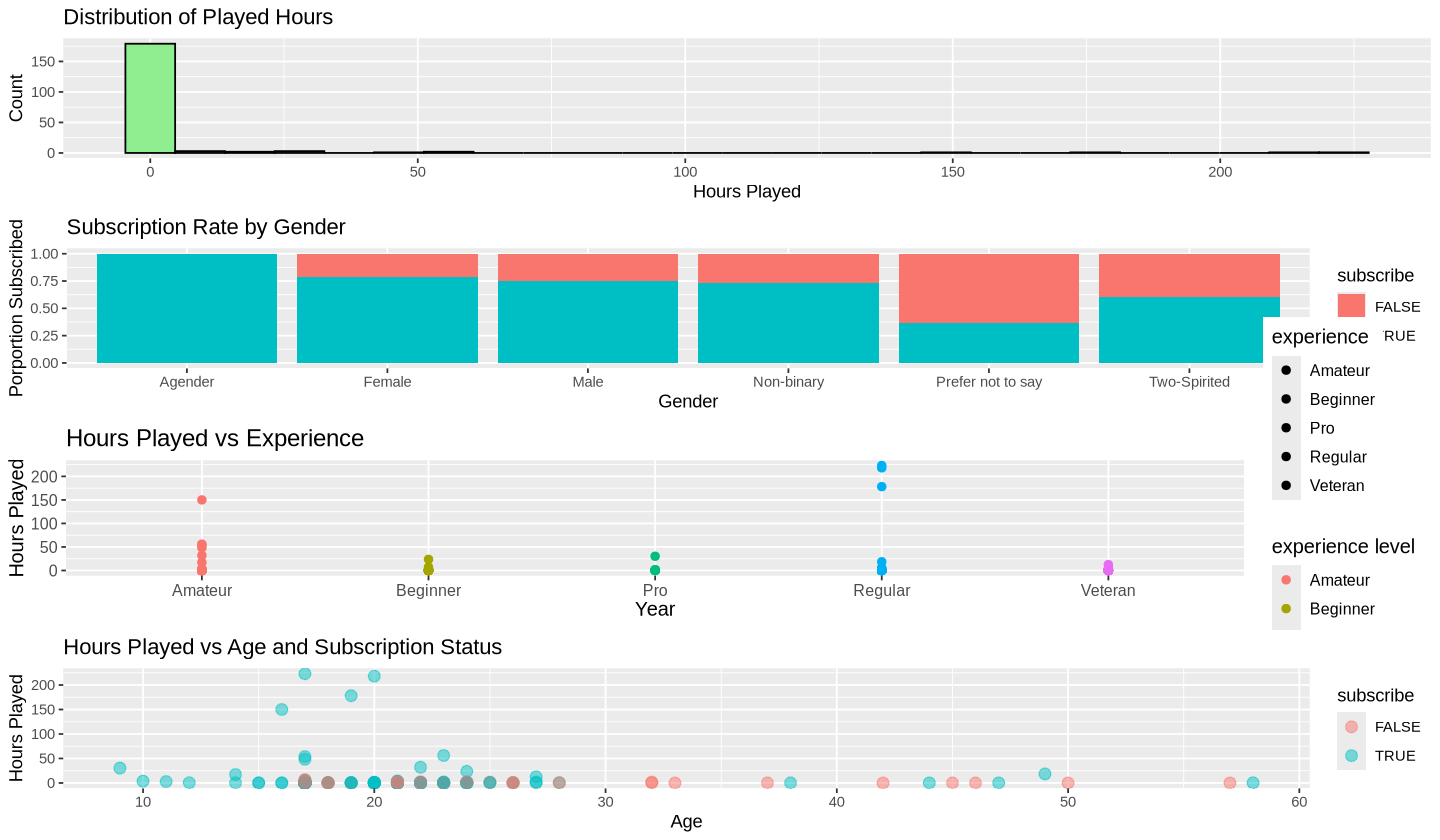

In [14]:
#side by side graph comparison:
grid.arrange(plot1, plot2, plot3, plot4, ncol=1)

Brief interpretation of the these graphs in relation to the question: 
1) Distribution of Played Hours: there's a strong right skew in this distribution suggesting that most users are casual and could be less likely to subscribe to a newsletter. Played hours could be a good predictor of subscription status as it is a show of interest. This data would have to be normalized before any further analysis.
2) Subscription Rate by Gender: Porportions of subscription to the newsletter do not seem significantly different between genders, however more analyses would be necessary to determine significance. It's impact as a subscription predictor is also not known.
3) Hours Played vs Experience: The 'amateur' and 'regular' level players have the highest playing hours but also the largest spreads among the groups.Higher engagment (seen via hours played and level reached), could correlate with higher subscription rate.
4) Hours Played vs Age and Subscription status: non subscribers ('FALSE') seem to be more concentated within lower playing hours. Age itself does not seem be a strong predictor of subscription status.   

## (4) Methods and (Proposed) Planning 

A method that could be useful in answering the proposed question would be k-NN classification for prediction. k-NN is very adaptable and does not assume linearity which could be helpful with this data set. The model can handle mixed variable types (i.e. experience and age) and does not assume any underlying distributions in the data. 
Assumptions and Weaknesses
- The method does assume that data points that are near each other have a similar outcome, which could be a limitation to this proposed method.
- The data has to be scaled for any analysis to be accurate.
Data processing and Splititng:
- Quantitative predictors will get standardised
- The data could be split into training and testing sets (70% and 30% respectively) to ensure stratificaiton and to preseve class porportions.
- use 5 fold cross validation on the training set to determine k and feature combinations. 